In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\Total phenolics.xlsx"
df = pd.read_excel(dataframe)

X = df.iloc[:, 2:]
y = df.iloc[:,1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
rfc = RandomForestRegressor(n_estimators=100, random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [7]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('-'*50)
print('Random Forest')
print('mse: ', mse)
print('r2: ', r2)
print('-'*50)

--------------------------------------------------
Random Forest
mse:  414.2094080214611
r2:  0.7634929032369799
--------------------------------------------------


In [8]:
#meas_ANN = pd.DataFrame(y)
#pred_ANN = pd.DataFrame(y_pred, columns = ['phenols'])
#df1 = pd.concat([meas_ANN , pred_ANN], axis = 1)

In [9]:
#df1.to_excel("phenols2.xlsx") 

In [10]:
f_list = list(X_test.columns)

In [11]:
f_importances = pd.Series(rfc.feature_importances_, index = f_list).sort_values(ascending = False)

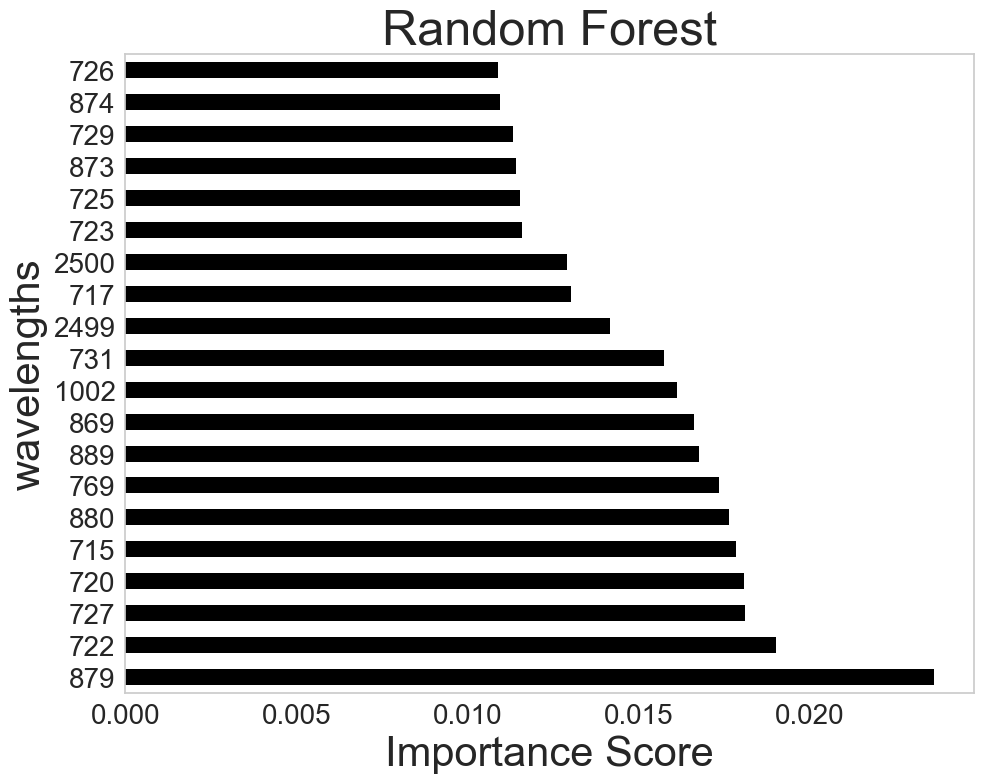

In [12]:
import matplotlib.pyplot as plt

importance = pd.Series(f_importances, index=X_train.columns).nlargest(20)
plt.figure(figsize=(10, 8))
importance.plot(kind='barh', color='#000000')
plt.title('Random Forest', fontsize=35)
plt.xlabel('Importance Score', fontsize=30)
plt.ylabel('wavelengths', fontsize=30)
# Remove the grid lines
plt.grid(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
importance_plot = plt.gcf()

In [9]:
d = pd.DataFrame(y_test)
d2 = pd.DataFrame(y_pred, columns = ['Phenolics'])
khaya = pd.concat([d, d2], axis = 1)

In [10]:
a, b = np.polyfit(d['phenols'], d2['Phenolics'], deg = 1)

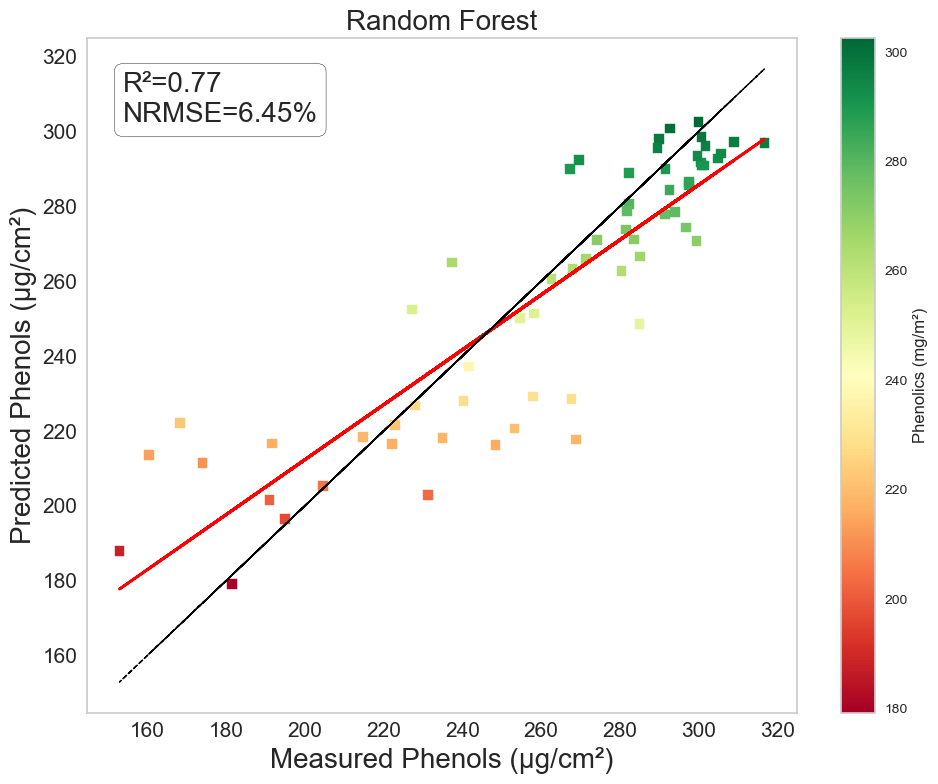

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming d and d2 are your DataFrames
# Fit a linear regression line
a, b = np.polyfit(d['phenols'], d2['Phenolics'], deg=1)
r2 = r2_score(d2['Phenolics'], a * d['phenols'] + b)
rmse = np.sqrt(mean_squared_error(d2['Phenolics'], a * d['phenols'] + b))
nrmse = (rmse / np.mean(d2['Phenolics'])) * 100  # Normalized RMSE in percentage

# Create the scatter plot with graduated colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(d['phenols'], d2['Phenolics'], c=d2['Phenolics'], cmap='RdYlGn', marker='s', label='Data Points')

# Plot the linear regression line
plt.plot(d['phenols'], a * d['phenols'] + b, color='red', linestyle='-', linewidth=2, label='Regression Line')

# Add the 1:1 line
plt.plot(d['phenols'], d['phenols'], color='black', linestyle='--', linewidth=1, label='1:1 Line')

# Add labels and title
plt.xlabel('Measured Phenols (μg/cm²)', fontsize=20)
plt.ylabel('Predicted Phenols (μg/cm²)', fontsize=20)
plt.title('Random Forest', fontsize=20)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar(scatter, label='Phenolics (mg/m²)')

# Add R² and NRMSE (%) information
text = f'R²={r2:.2f}\nNRMSE={nrmse:.2f}%'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()